# History data loading notebook

In [1]:
import pickle
import matplotlib.pyplot as plt
import math

In [2]:
# loading the history file (here history.pkl)
f = open("run1.pkl", "rb")
data = pickle.load(f)

In [3]:
print(data[0].keys())

dict_keys(['visPos', 'fltPos', 'path', 'map', 'goal', 'pathComputed', 'vtime', 'started', 'running', 'time', 'state'])


In [4]:
def loadKeySeq(data, key):
    retList = []
    for item in data:
        retList.append(item[key])
        
    return retList

## Plot example, running time of vision loop

In [5]:
visTimes = loadKeySeq(data,'vtime')
time = loadKeySeq(data,'time')

In [6]:
visTimes = [float(el) for el in visTimes]
time = [float(el) for el in time]

In [7]:
avg_vis_time = sum(visTimes)/len(visTimes)
print(avg_vis_time)

0.6511489707317082


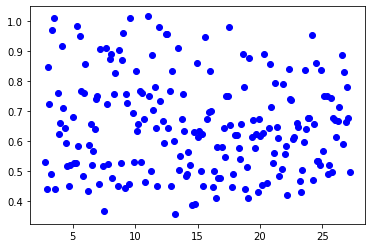

In [8]:
plt.plot(time,visTimes, 'bo') 

In [9]:
def mapPlot(map=False,start=False,finish=False,visPos=False, kalPos = False):
        #plotting parameters
        fsz = 8 # size of the plotted figure
        polyColor = "blue" # color of the map polygons
        polyFillColor = "#b8e7f5" # color of interior of the map polygons
        startColor = "green" # color of the starting point
        finishColor = "red" # color the the finish point
        debugLineColor = "red"
        emphasedLineColor = "green"

        #defining a function to plot a polygon :
        #setting map limits
        plt.xlim(0,100)
        plt.ylim(0,100)

        fig = plt.gcf()
        ax = fig.gca()

        ## we need origin to right so we flip the plot
        ax.invert_yaxis()
        fig.set_size_inches((fsz,fsz))
        

        ## plotting polygons
        if map !=False:
            polyMap = []
            for poly in map:
                nPoly = []
                for p in poly:
                    nPoly.append( (float(p[0][0]),float(p[0][1])))
                polyMap.append(nPoly)
                
            for poly in polyMap:
                for i in range(len(poly)-1):
                    plt.plot([ poly[i][0],poly[i+1][0] ],[ poly[i][1],poly[i+1][1] ],color=polyColor)
                plt.plot([ poly[len(poly)-1][0],poly[0][0] ],[ poly[len(poly)-1][1],poly[0][1] ],color=polyColor)
                x = []
                y = []
                for vertex in poly:
                    x.append(vertex[0])
                    y.append(vertex[1])
                plt.Polygon(poly,color=polyColor)
                ax.fill(x,y,color = polyFillColor)  
        
        #Displaying start and finish
        if start != False:
            startCircle = plt.Circle(start,radius=1,color="black")
            ax.add_artist(startCircle)
            ax.text(*start,"Start",fontsize=11,color=startColor,weight="bold")
        if finish != False:
            finishCircle = plt.Circle(finish,radius=1,color="black")
            ax.add_artist(finishCircle)
            ax.text(*finish,"Finish",fontsize=11,color=finishColor,weight="bold")
            
        if visPos != False:
            for i in range(1,len(visPos)):
                plt.plot([ visPos[i-1][0],visPos[i][0] ],[ visPos[i-1][1],visPos[i][1] ],color="red",linestyle="dashed",linewidth=2)
                        
        if kalPos != False:
            for i in range(1,len(kalPos)):
                plt.plot([ kalPos[i-1][0],kalPos[i][0] ],[ kalPos[i-1][1],kalPos[i][1] ],color="blue",linestyle="dashed",linewidth=2)
                        
        #displaying the map
        plt.show()

# Plot trajectories of a given run : 

In [10]:
def plotTrajectories(data):
    visPos = loadKeySeq(data,'visPos')

    kalPos = loadKeySeq(data,'fltPos')

    start = (data[0]['visPos'][0],data[0]['visPos'][1])
    goal = data[-1]['path'][-1]

    mp = data[-1]['map']
    mapPlot(map = mp,start=start, finish = goal, visPos=visPos,kalPos = kalPos)


<ipython-input-9-4cadf7bda141>:25: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if map !=False:
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


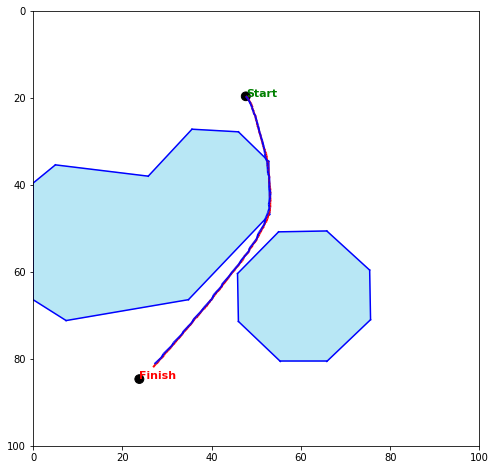

In [11]:
plotTrajectories(data)

In [67]:
loadKeySeq(data,'state')

['ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'ASTOLFI',
 'AS